In [1]:
# TODO
# 1. save the column names of 19,59 matrices into a pickle list


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

df = pd.read_excel('./data/final_data/ratios_plbs_agg_100_autosect.xlsx')

non_features = ['Co_Code','CO_NAME','Year End','Year','Month']

features = [i for i in df.columns if i not in non_features]

with open('./data/final_data/col_names_list.pkl','wb') as f:
    pickle.dump(features , f)

In [2]:
# removing companies with less than 10 datapoints
freq_df = df.CO_NAME.value_counts()
com_names = freq_df[freq_df>=10].index
print('shape before filtering companies' , df.shape)
df = df[df.CO_NAME.isin(com_names)]
print('shape after filtering companies' , df.shape)

df.replace([np.inf,-np.inf],np.nan , inplace=True)

shape before filtering companies (1679, 61)
shape after filtering companies (1667, 61)


In [3]:
#removing the duplicates 
print('shape before removing the duplicates ' , df.shape)
df.drop_duplicates(inplace=True)
print('shape after removing the duplicates' , df.shape)

sub = df[df.CO_NAME==df.CO_NAME.unique()[-1]]

# removing the na values
#removing the duplicates 
print('shape before removing the na ' , df.shape)
df.dropna(inplace=True)
print('shape after removing the na' , df.shape)

com_list = df.CO_NAME.unique()

shape before removing the duplicates  (1667, 61)
shape after removing the duplicates (1667, 61)
shape before removing the na  (1667, 61)
shape after removing the na (1665, 61)


In [9]:
mat_list = []

for cmpy in com_list:
    sub = df[df.CO_NAME==cmpy]
    sub.sort_values(['Year End'],inplace=True)
#     print(sub.Year.tolist())
#     print(sub.Month.tolist())
    mat_list.append(sub[features].values)

store_dict = dict((i,j) for i,j in zip(com_list,mat_list))

/Users/nithishreddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
import pickle

with open('./data/final_data/company_data_dict.pkl','wb') as f:
    pickle.dump(store_dict , f)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def mat_to_vec(mat):
    scaler = StandardScaler()
    mat = scaler.fit_transform(mat)
    pca = PCA()
    pca.fit(mat)
    return pca.components_[0]

n = 0

In [13]:
df_inp = []

for cmpy_name , mat in zip(com_list,mat_list):
    try:
        df_inp.append( [cmpy_name] + list(mat_to_vec(mat)) )
    except:
        print(cmpy_name)

df_inp = pd.DataFrame(df_inp)

df_inp.rename(columns={0:'Co_Name'},inplace=True)

df_inp.to_pickle('./data/final_data/cluster_data.pkl')

###Using the first principal component

In [16]:
df_inp.shape

(96, 60)

Text(0.5,1,'elbow method')

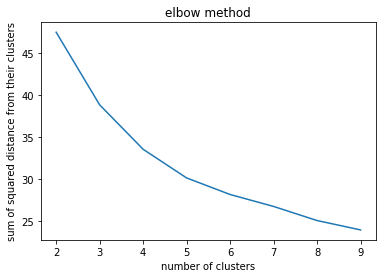

In [14]:
X = df_inp.values[:,1:]

from sklearn.cluster import KMeans

inertia_list = []
x_axis  = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    val = kmeans.inertia_
    inertia_list.append(val)
    x_axis.append(i)
plt.plot(x_axis,inertia_list)
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distance from their clusters')
plt.title('elbow method')

In [161]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print(X.shape , df_inp.shape)
cmpy_names = df_inp.Co_Name
print(len(cmpy_names))

ll = zip(list(cmpy_names) , list(kmeans.labels_))

from collections import defaultdict

ll_dict = defaultdict(list)

for i,j in ll:
    ll_dict[j] = ll_dict[j]+[i]

print_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ll_dict.items() ]))
print_df.to_csv('./reports/5_clusters_companies.csv',index = False)

In [162]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(X.shape , df_inp.shape)
cmpy_names = df_inp.Co_Name
print(len(cmpy_names))

ll = zip(list(cmpy_names) , list(kmeans.labels_))

from collections import defaultdict

ll_dict = defaultdict(list)

for i,j in ll:
    ll_dict[j] = ll_dict[j]+[i]

print_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ll_dict.items() ]))
print_df.to_csv('./reports/3_clusters_companies.csv',index = False)

(94, 59) (94, 60)
94


In [163]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print(X.shape , df_inp.shape)
cmpy_names = df_inp.Co_Name
print(len(cmpy_names))

ll = zip(list(cmpy_names) , list(kmeans.labels_))

from collections import defaultdict

ll_dict = defaultdict(list)

for i,j in ll:
    ll_dict[j] = ll_dict[j]+[i]

print_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ll_dict.items() ]))
print_df.to_csv('./reports/4_clusters_companies.csv',index = False)

(94, 59) (94, 60)
94


In [164]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
print(X.shape , df_inp.shape)
cmpy_names = df_inp.Co_Name
print(len(cmpy_names))

ll = zip(list(cmpy_names) , list(kmeans.labels_))

from collections import defaultdict

ll_dict = defaultdict(list)

for i,j in ll:
    ll_dict[j] = ll_dict[j]+[i]

print_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ll_dict.items() ]))
print_df.to_csv('./reports/6_clusters_companies.csv',index = False)

(94, 59) (94, 60)
94


In [165]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
print(X.shape , df_inp.shape)
cmpy_names = df_inp.Co_Name
print(len(cmpy_names))

ll = zip(list(cmpy_names) , list(kmeans.labels_))

from collections import defaultdict

ll_dict = defaultdict(list)

for i,j in ll:
    ll_dict[j] = ll_dict[j]+[i]

print_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ll_dict.items() ]))
print_df.to_csv('./reports/7_clusters_companies.csv',index = False)

(94, 59) (94, 60)
94


In [166]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
print(X.shape , df_inp.shape)
cmpy_names = df_inp.Co_Name
print(len(cmpy_names))

ll = zip(list(cmpy_names) , list(kmeans.labels_))

from collections import defaultdict

ll_dict = defaultdict(list)

for i,j in ll:
    ll_dict[j] = ll_dict[j]+[i]

print_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ll_dict.items() ]))
print_df.to_csv('./reports/8_clusters_companies.csv',index = False)

(94, 59) (94, 60)
94


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4153790500626801


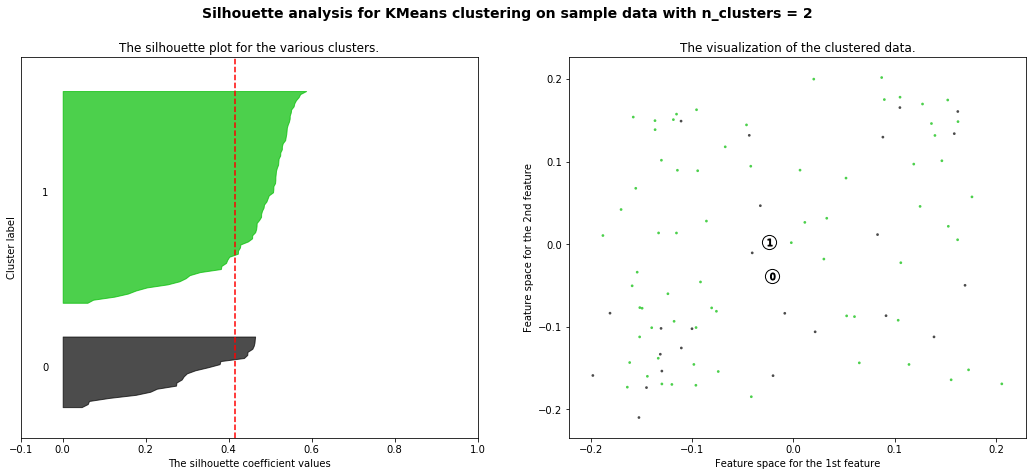

For n_clusters = 3 The average silhouette_score is : 0.24119747787444304


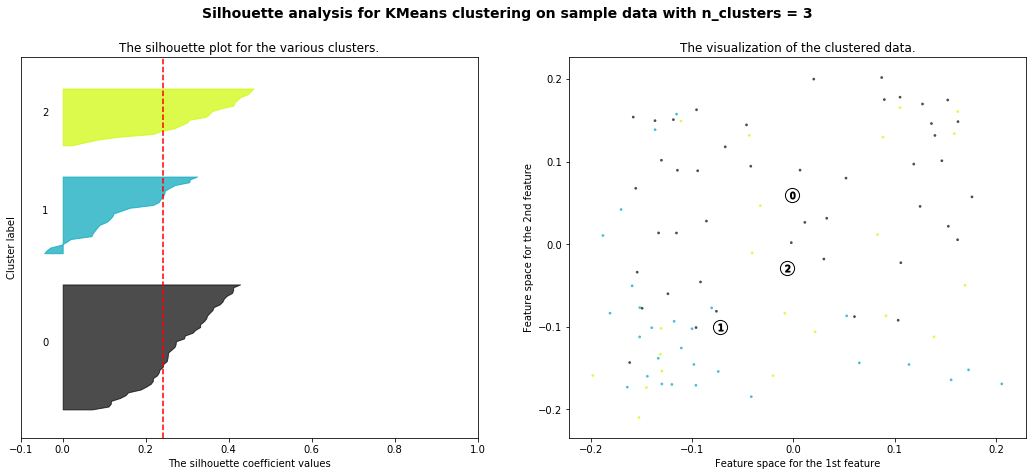

For n_clusters = 4 The average silhouette_score is : 0.2231272364377947


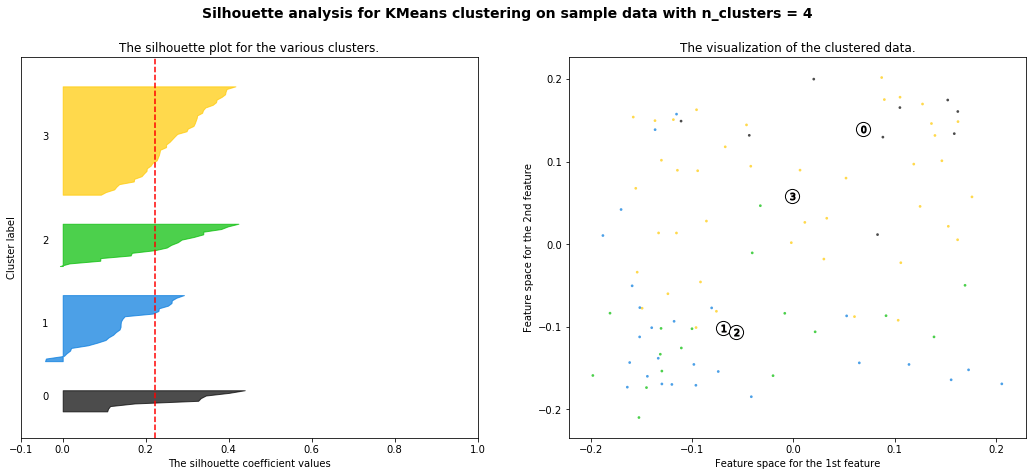

For n_clusters = 5 The average silhouette_score is : 0.18264802952916234


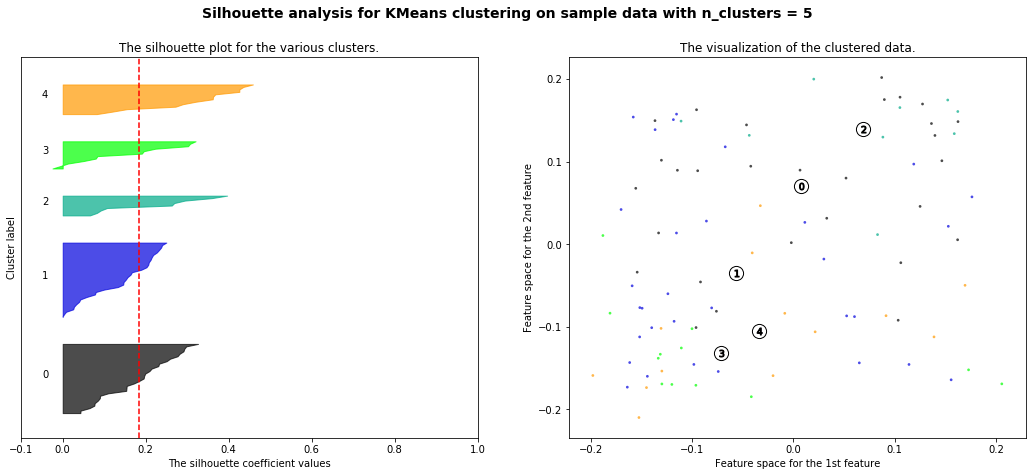

For n_clusters = 6 The average silhouette_score is : 0.16640476293197853


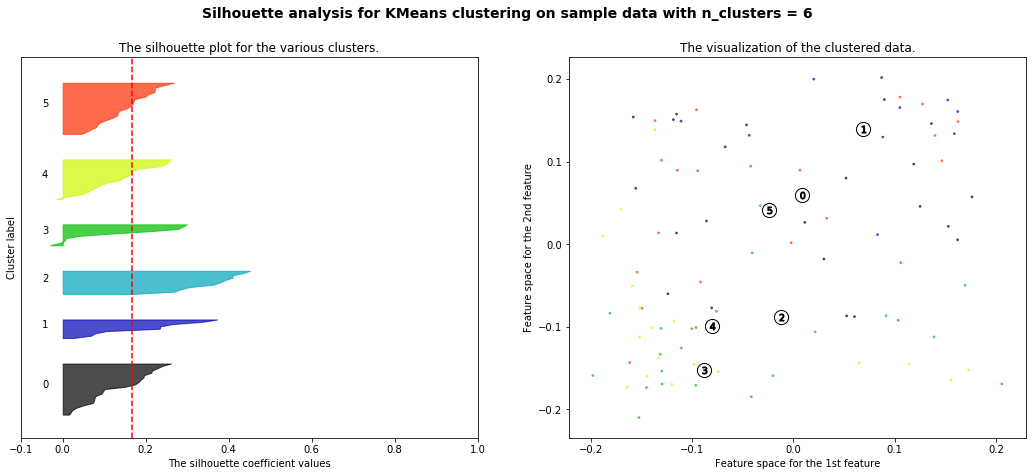

In [201]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_inp.values[:,1:]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Above silhouette graphs are constructed using First Eigen vector

###================================##

In [101]:
def mat_to_vec(mat):
    scaler = StandardScaler()
    mat = scaler.fit_transform(mat)
    pca = PCA()
    pca.fit(mat)
    return pca.components_[:2].ravel()

In [102]:
n = 0

df_inp = []

for cmpy_name , mat in zip(com_list,mat_list):
    try:
        df_inp.append( [cmpy_name] + list(mat_to_vec(mat)) )
    except:
        print(cmpy_name)

df_inp = pd.DataFrame(df_inp)

df_inp.rename(columns={0:'Co_Name'},inplace=True)

Rane Engine Val.
Rane Brake Lin.


Text(0.5,1,'elbow method using 2 eigen vectors')

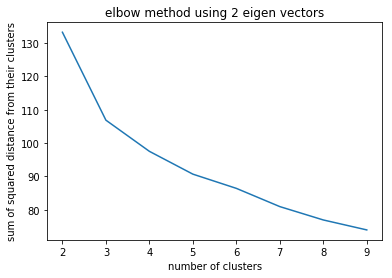

In [106]:
X = df_inp.values[:,1:]

from sklearn.cluster import KMeans

inertia_list = []
x_axis  = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    val = kmeans.inertia_
    inertia_list.append(val)
    x_axis.append(i)
plt.plot(x_axis,inertia_list)
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distance from their clusters')
plt.title('elbow method using 2 eigen vectors')

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2023869034432077


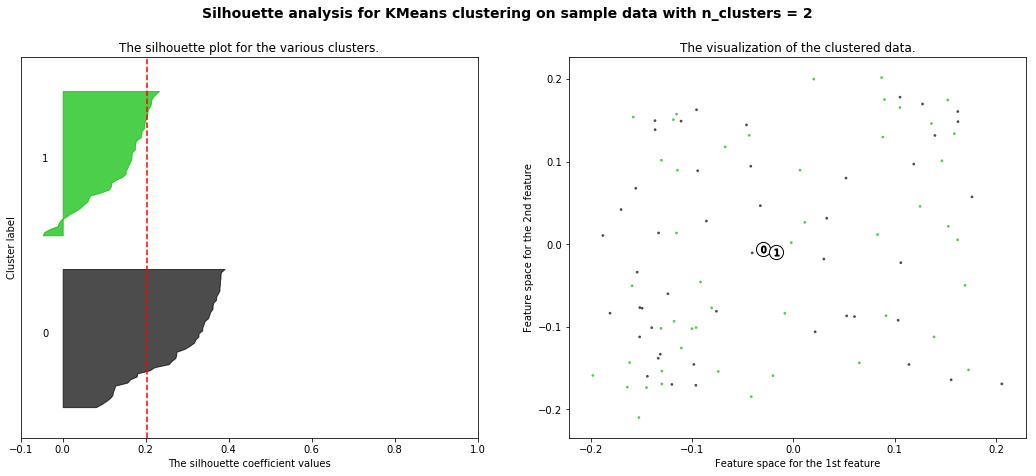

For n_clusters = 3 The average silhouette_score is : 0.23664274788211798


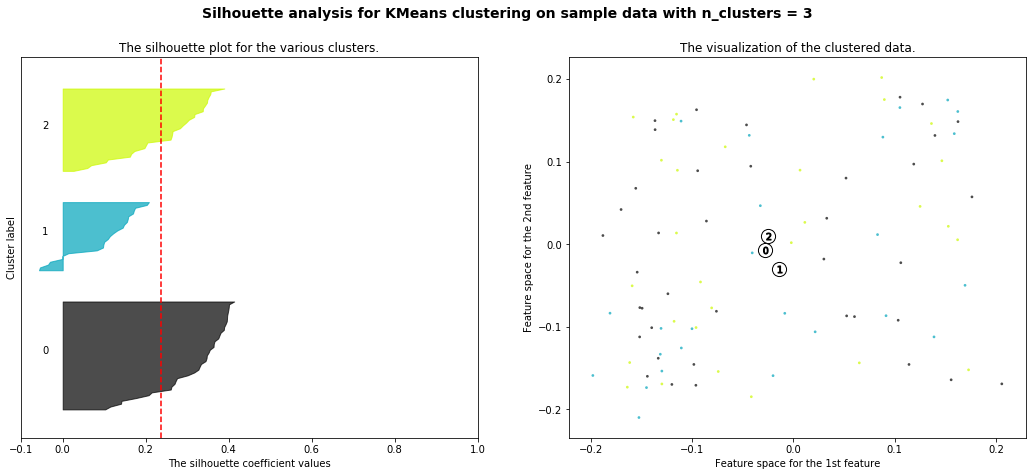

For n_clusters = 4 The average silhouette_score is : 0.24523900356247721


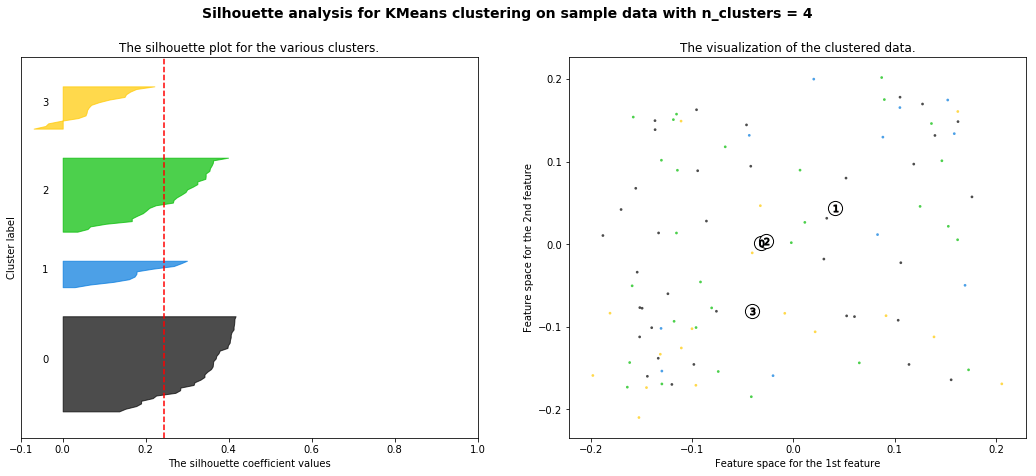

For n_clusters = 5 The average silhouette_score is : 0.20842076847675797


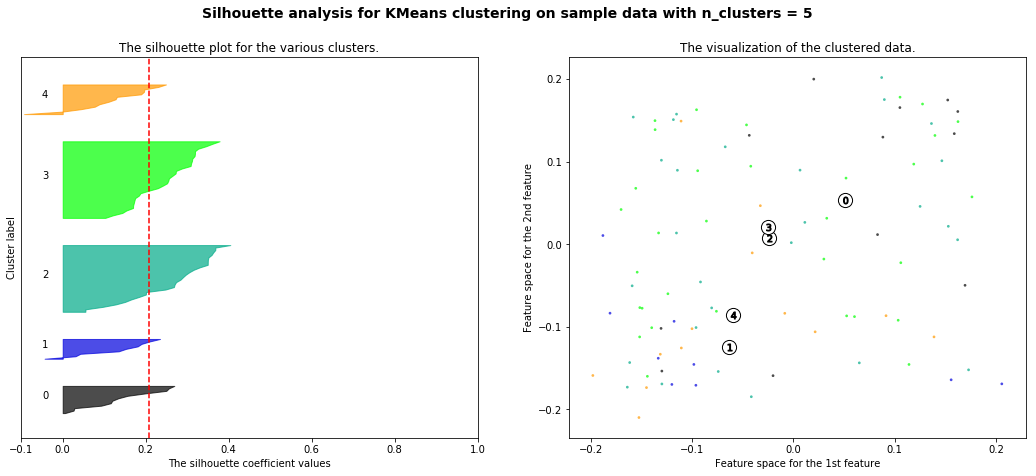

For n_clusters = 6 The average silhouette_score is : 0.20801598682215058


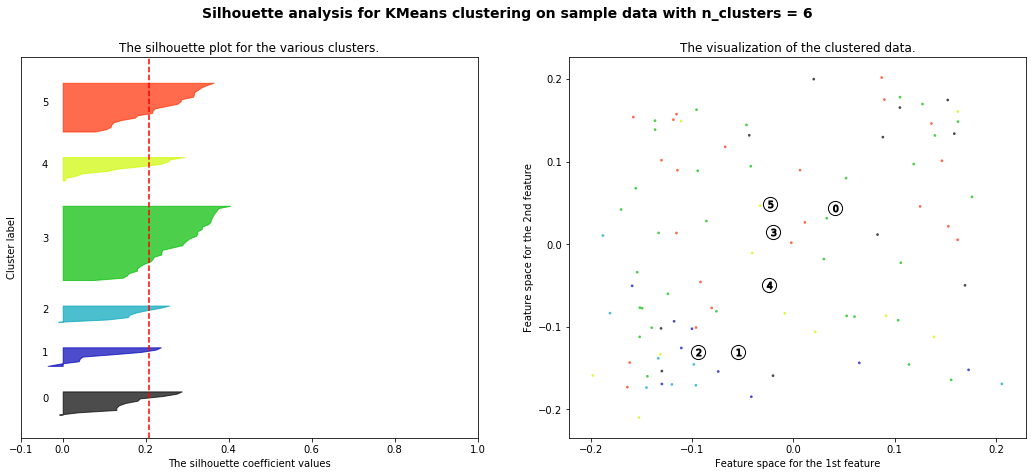

In [107]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_inp.values[:,1:]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Using the first 2 eigen vectors for the above diagrams

In [108]:
# using np.linalg.svd

In [ ]:
def mat_to_vec(mat):
    scaler = StandardScaler()
    mat = scaler.fit_transform(mat)
    pca = PCA()
    pca.fit(mat)
    return pca.components_[:2].ravel()

In [113]:
n = 0

df_inp = []

for cmpy_name , mat in zip(com_list,mat_list):
    try:
        df_inp.append( [cmpy_name] + list(mat_to_vec(mat)) )
    except:
        print(cmpy_name)

df_inp = pd.DataFrame(df_inp)

df_inp.rename(columns={0:'Co_Name'},inplace=True)

Rane Engine Val.
Rane Brake Lin.


Text(0.5,1,'elbow method using 2 eigen vectors from numpy lin alg')

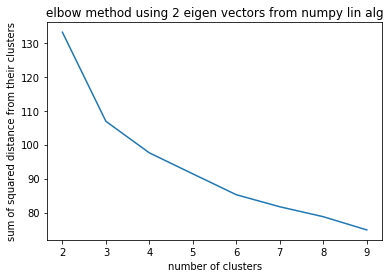

In [114]:
X = df_inp.values[:,1:]

from sklearn.cluster import KMeans

inertia_list = []
x_axis  = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    val = kmeans.inertia_
    inertia_list.append(val)
    x_axis.append(i)
plt.plot(x_axis,inertia_list)
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distance from their clusters')
plt.title('elbow method using 2 eigen vectors from numpy lin alg')

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2023869034432077


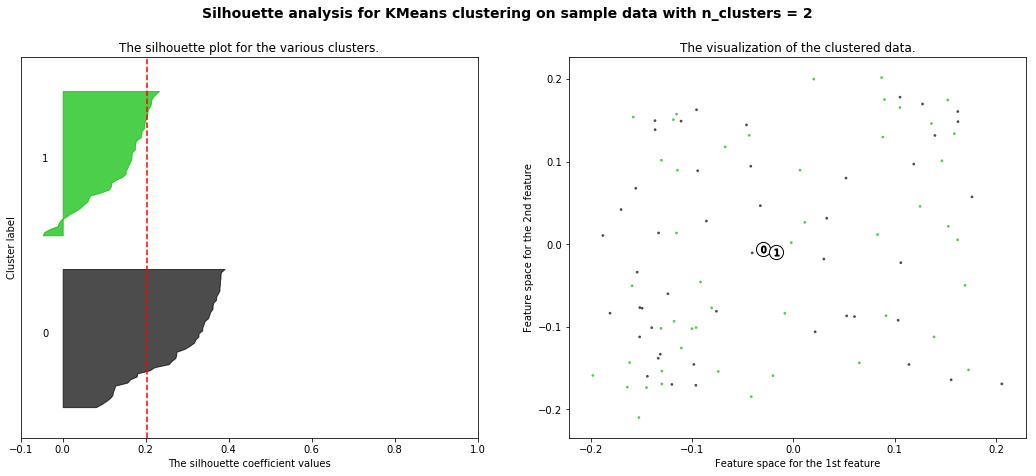

For n_clusters = 3 The average silhouette_score is : 0.23664274788211798


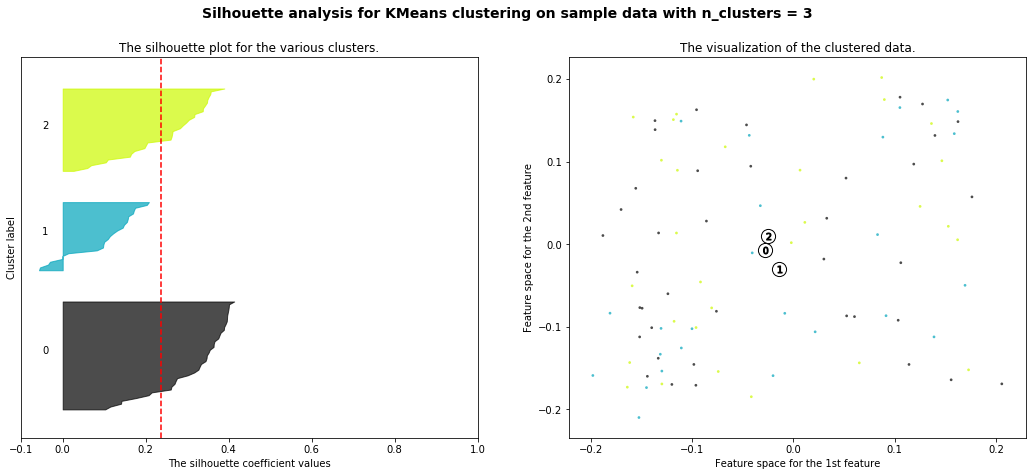

For n_clusters = 4 The average silhouette_score is : 0.24523900356247721


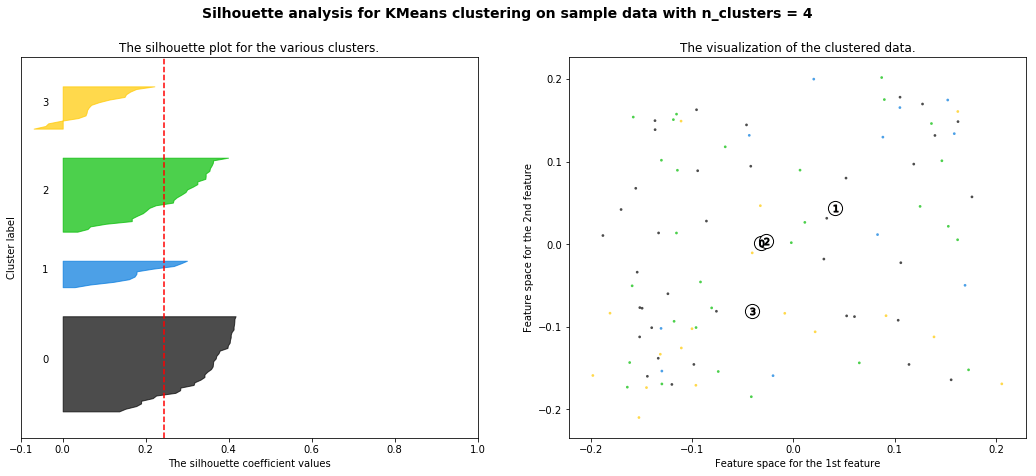

For n_clusters = 5 The average silhouette_score is : 0.20842076847675797


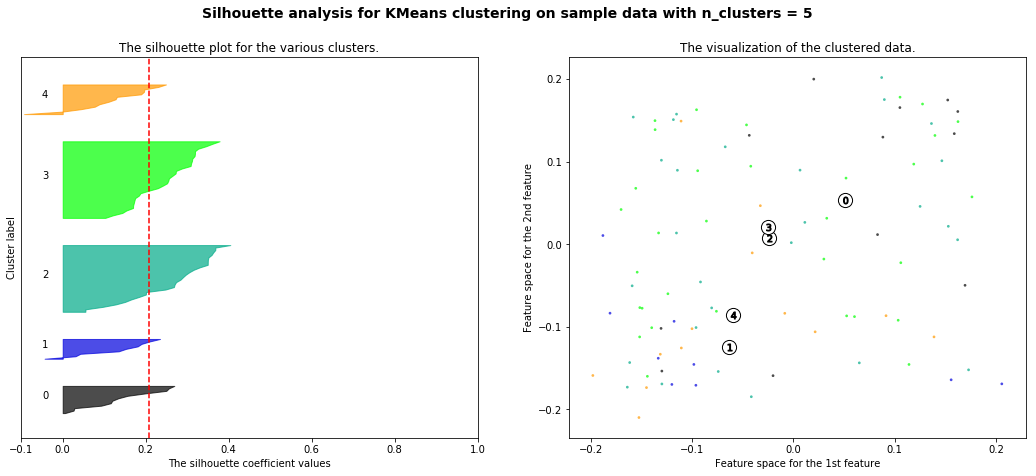

For n_clusters = 6 The average silhouette_score is : 0.20801598682215058


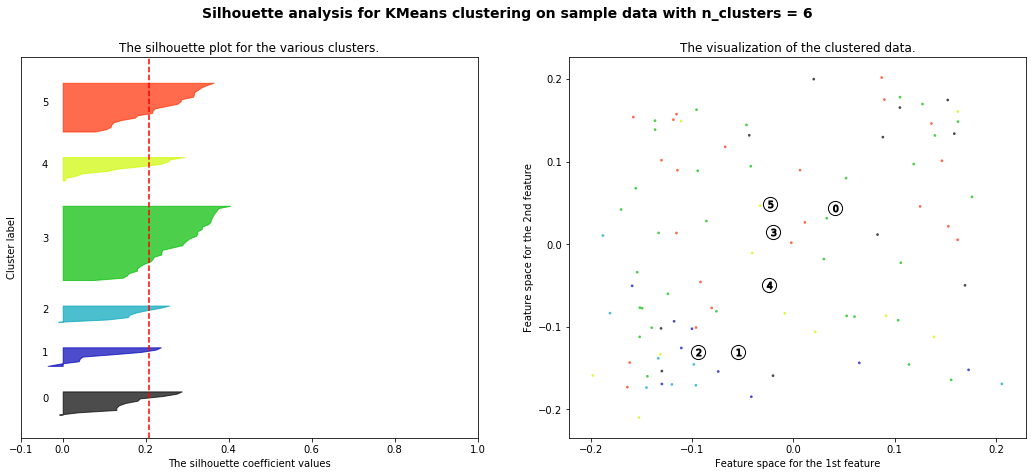

In [115]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_inp.values[:,1:]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Using SVD to extract properties of matrices into (10,10) form

In [71]:
def mat_to_red_dim(mat):
    mat = mat[-10:,:]
    scaler = StandardScaler()
    mat = scaler.fit_transform(mat)
    pca = PCA()
    return pca.fit_transform(mat).ravel()
    

In [72]:
n = 0

df_inp = []

for cmpy_name , mat in zip(com_list,mat_list):
    try:
        df_inp.append( [cmpy_name] + list(mat_to_red_dim(mat)) )
    except:
        print(cmpy_name)

df_inp = pd.DataFrame(df_inp)

df_inp.rename(columns={0:'Co_Name'},inplace=True)

Text(0.5,1,'elbow method')

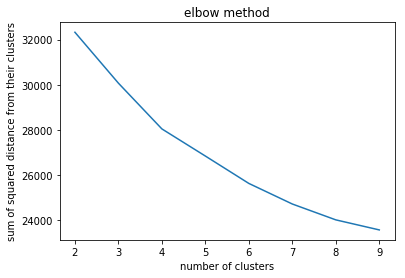

In [73]:
X = df_inp.values[:,1:]

from sklearn.cluster import KMeans

inertia_list = []
x_axis  = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    val = kmeans.inertia_
    inertia_list.append(val)
    x_axis.append(i)
plt.plot(x_axis,inertia_list)
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distance from their clusters')
plt.title('elbow method')

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.33605131937631055


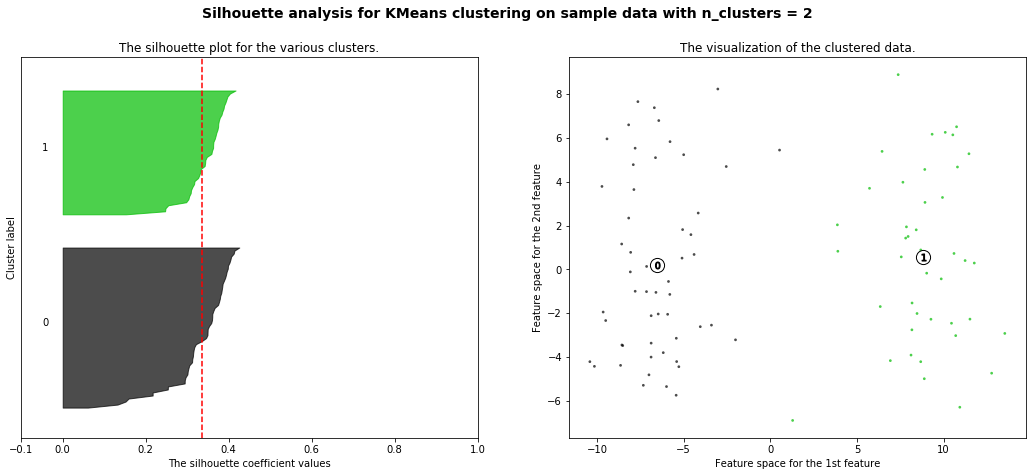

For n_clusters = 3 The average silhouette_score is : 0.20082432396812125


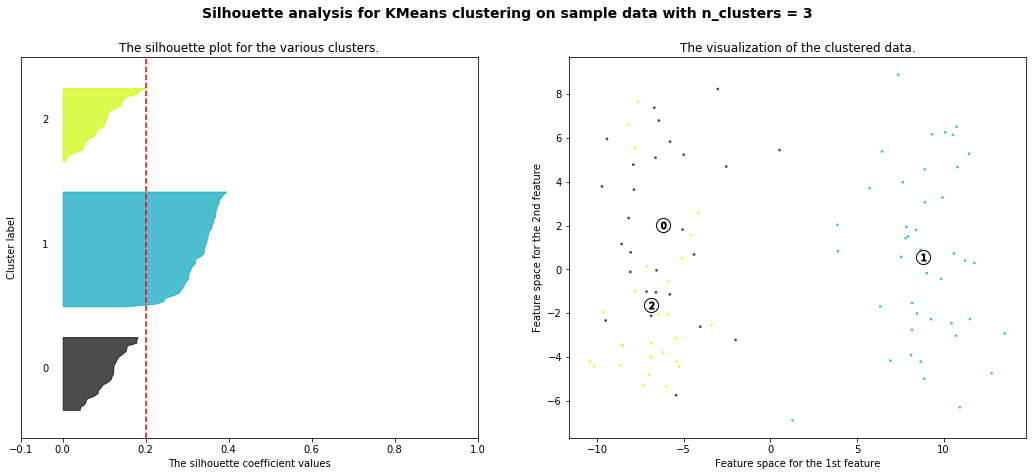

For n_clusters = 4 The average silhouette_score is : 0.11317602431956449


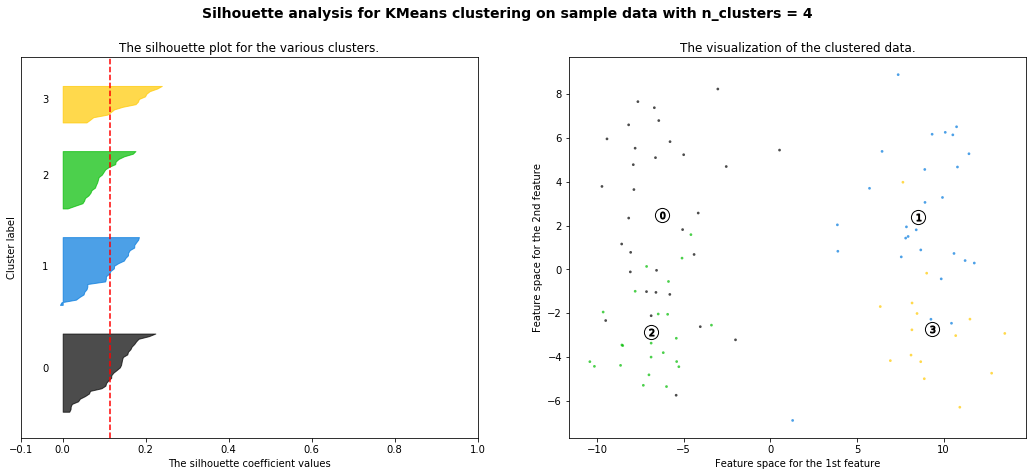

For n_clusters = 5 The average silhouette_score is : 0.10628155844070425


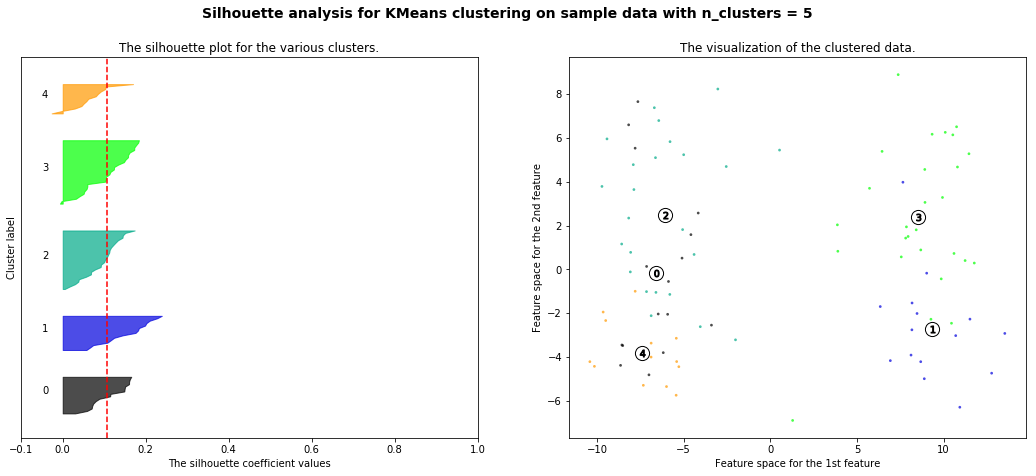

For n_clusters = 6 The average silhouette_score is : 0.10820521079637446


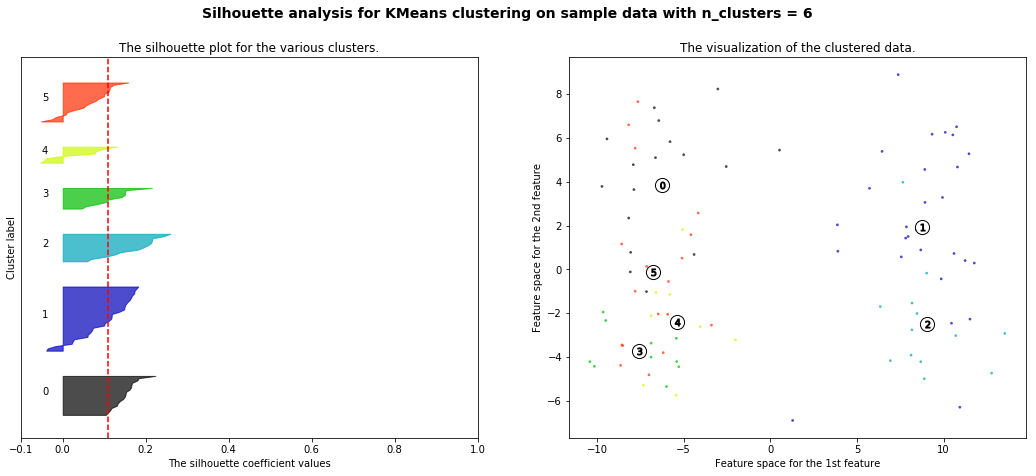

In [235]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_inp.values[:,1:]
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Using SVD to reduce the dimension of matrix and then using the similarity between matrices